**Importer les bibliothèques nécessaires**

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import filters
from scipy import ndimage
from skimage.util import random_noise

**Partie I : filtrage passe-bas**
1. Bruitage d’une image



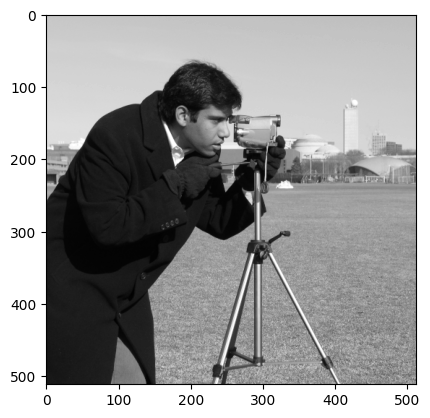

In [12]:
# charger un exemple  d'image de la bibliothèque skimage
camera=data.camera()
# affichage de l'image
plt.imshow(camera, 'gray')


**Bruit de type «poivre-et-sel»**

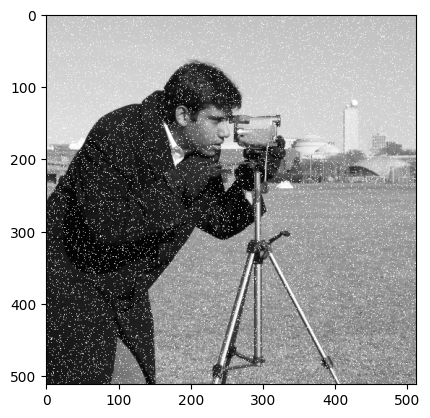

In [24]:
# Bruitage de l'image
noise = random_noise(camera, mode="salt")

# Affichage de l'image bruitée
plt.imshow(noise, cmap="gray")
plt.show()

---> nous utilisons la fonction random_noise() de la bibliothèque skimage.util pour créer du bruit de type «poivre-et-sel». Cette fonction prend en entrée une image et un type de bruit à appliquer. Dans ce cas, nous avons utilisé le mode "salt", qui signifie que les pixels seront remplacés par des valeurs de 0 ou 255 avec une probabilité égale à 0,1.



**Bruit de type «gaussien»**

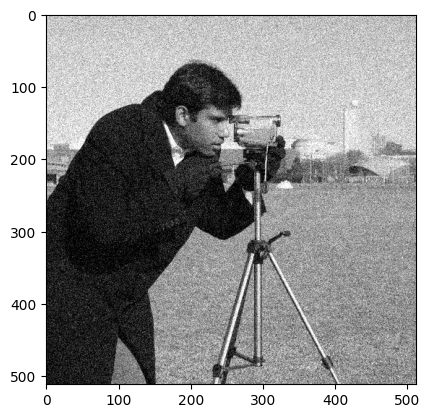

In [32]:
# Bruitage de l'image
noise = random_noise(camera, mode="gaussian", var=0.01)

# Affichage de l'image bruitée
plt.imshow(noise, cmap="gray")
plt.show()

---> nous utilisons la fonction random_noise() de la bibliothèque skimage.util pour créer du bruit de type «gaussien». Cette fonction prend en entrée une image et un type de bruit à appliquer. Dans ce cas, nous avons utilisé le mode "gaussian", qui signifie que le bruit sera distribué selon une distribution gaussienne. Le paramètre var permet de contrôler l'intensité du bruit. Dans ce cas, nous avons utilisé une valeur de 0,01, ce qui correspond à un bruit modéré.

2. Filtrage moyenneur

In [33]:
# Filtrage moyenneur 3x3
kernel = np.ones((3, 3), dtype=float) / 9
filtered_3x3 = ndimage.convolve(camera, kernel)

# Filtrage moyenneur 5x5
kernel = np.ones((5, 5), dtype=float) / 25
filtered_5x5 = ndimage.convolve(camera, kernel)

# Filtrage moyenneur 7x7
kernel = np.ones((7, 7), dtype=float) / 49
filtered_7x7 = ndimage.convolve(camera, kernel)


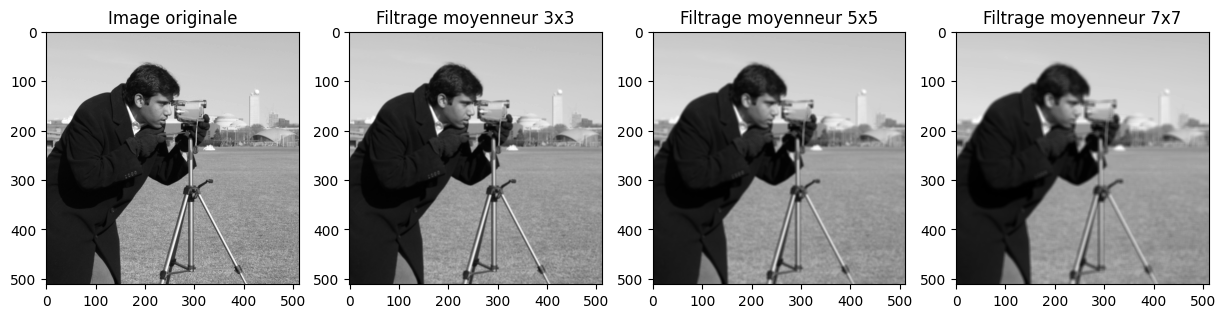

In [39]:
# Affichage des images
plt.figure(figsize=(15, 5))

plt.subplot(141)
plt.imshow(camera, cmap="gray")
plt.title("Image originale")

plt.subplot(142)
plt.imshow(filtered_3x3, cmap="gray")
plt.title("Filtrage moyenneur 3x3")

plt.subplot(143)
plt.imshow(filtered_5x5, cmap="gray")
plt.title("Filtrage moyenneur 5x5")

plt.subplot(144)
plt.imshow(filtered_7x7, cmap="gray")
plt.title("Filtrage moyenneur 7x7")

plt.show()

--->Comme on peut le voir, le filtrage moyenneur a pour effet de lisser l'image. Cela est dû au fait que les valeurs des pixels sont remplacées par la moyenne des valeurs des pixels voisins. Plus le noyau de convolution est grand, plus le lissage est important.

En effet, un noyau de convolution plus grand prend en compte plus de pixels voisins, ce qui donne une valeur plus représentative de la moyenne. Par conséquent, le filtrage moyenneur avec un noyau de convolution de taille 7x7 donne un lissage plus important que le filtrage moyenneur avec un noyau de convolution de taille 3x3.

3. Filtrage médian

In [45]:
# Filtrage médian 3x3
filtered_3x3 = ndimage.median_filter(camera, size=3)

# Filtrage médian 7x7
filtered_7x7 = ndimage.median_filter(camera, size=7)


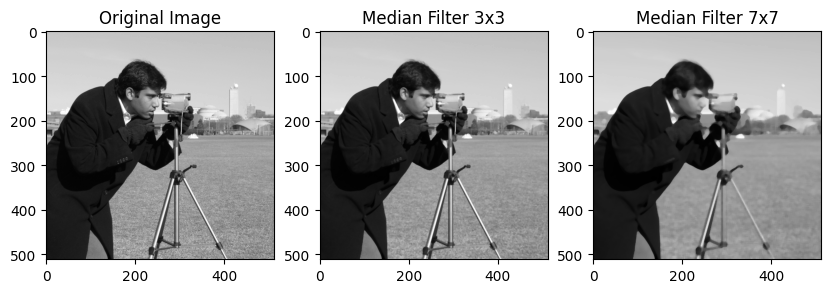

In [48]:
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(camera, cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(filtered_3x3, cmap='gray')
plt.title('Median Filter 3x3')

plt.subplot(133)
plt.imshow(filtered_7x7, cmap='gray')
plt.title('Median Filter 7x7')

plt.show()

--->Le filtrage moyenneur et le filtrage médian sont deux techniques de débruitage efficaces. Ils ont tous deux pour effet de réduire le bruit tout en conservant les contours de l'image.

Cependant, il existe quelques différences entre les deux techniques. Le filtrage moyenneur prend en compte la moyenne des pixels voisins, tandis que le filtrage médian prend en compte la valeur médiane des pixels voisins.

---->Le choix de la technique de débruitage à utiliser dépend de l'application. **Si l'objectif est de réduire le bruit tout en conservant les contours de l'image, le filtrage médian est généralement la meilleure option. Cependant, si l'objectif est de réduire le bruit de manière agressive, le filtrage moyenneur peut être une meilleure option.**

4. Filtrage gaussian

In [49]:
# Bruitage de l'image
noise = np.random.normal(0, 10, camera.shape)
noisy_image = camera + noise


In [50]:
# Filtrage gaussien pour sigma = 1
filtered_1 = filters.gaussian(noisy_image, sigma=1)

# Filtrage gaussien pour sigma = 3
filtered_3 = filters.gaussian(noisy_image, sigma=3)

# Filtrage gaussien pour sigma = 5
filtered_5 = filters.gaussian(noisy_image, sigma=5)


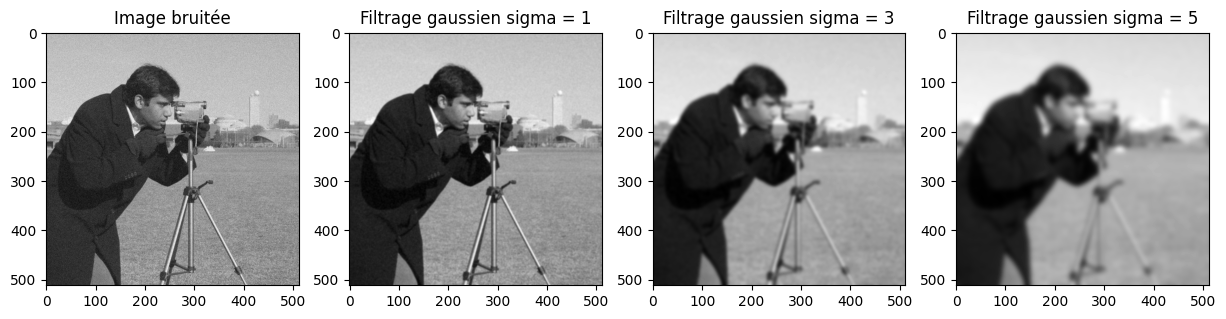

In [53]:
# Affichage des images
plt.figure(figsize=(15, 5))


plt.subplot(141)
plt.imshow(noisy_image, cmap="gray")
plt.title("Image bruitée")

plt.subplot(142)
plt.imshow(filtered_1, cmap="gray")
plt.title("Filtrage gaussien sigma = 1")

plt.subplot(143)
plt.imshow(filtered_3, cmap="gray")
plt.title("Filtrage gaussien sigma = 3")

plt.subplot(144)
plt.imshow(filtered_5, cmap="gray")
plt.title("Filtrage gaussien sigma = 5")

plt.show()

Comme on peut le voir, le filtrage gaussien a pour effet de réduire le bruit de l'image. L'effet du filtrage est plus important pour les valeurs de sigma plus élevées.

**Pour sigma = 1**, le filtrage gaussien réduit le bruit de manière significative, mais il conserve également les détails de l'image.

**Pour sigma = 3**, le filtrage gaussien réduit encore plus le bruit, mais il commence à flouter les détails de l'image.

**Pour sigma = 5**, le filtrage gaussien réduit le bruit de manière très importante, mais il floute fortement les détails de l'image.

**Partie II: Filtrage passe_haut**
: Filtrage par convolution

In [62]:
# Noyau du filtre passe-haut
filtre_passe_haut = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]]) / 9


In [68]:
# Appliquer le filtre passe-haut
IPH = ndimage.convolve(camera, filtre_passe_haut)

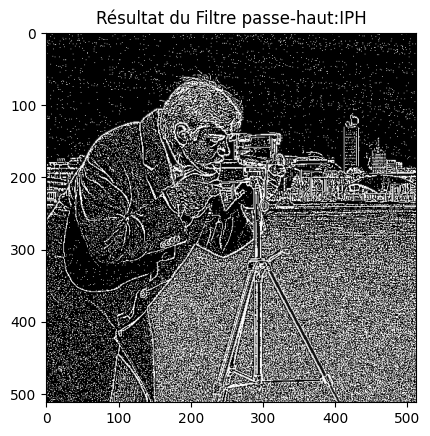

In [70]:
# Afficher le résultat du filtre passe-haut
plt.imshow(IPH, cmap='gray')
plt.title('Résultat du Filtre passe-haut:IPH')
plt.show()

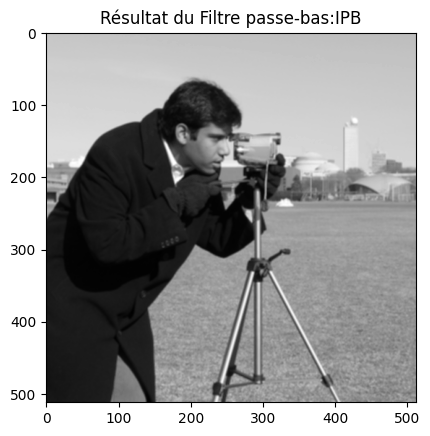

In [71]:
# Noyau du filtre passe-bas (moyenne 3x3)
filtre_passe_bas = np.ones((3, 3), dtype=float) / 9

# Appliquer le filtre passe-bas
IPB = ndimage.convolve(camera, filtre_passe_bas)

# Afficher le résultat du filtre passe-bas
plt.imshow(IPB, cmap='gray')
plt.title('Résultat du Filtre passe-bas:IPB')
plt.show()

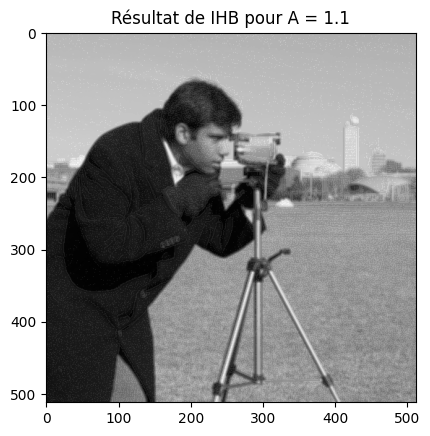

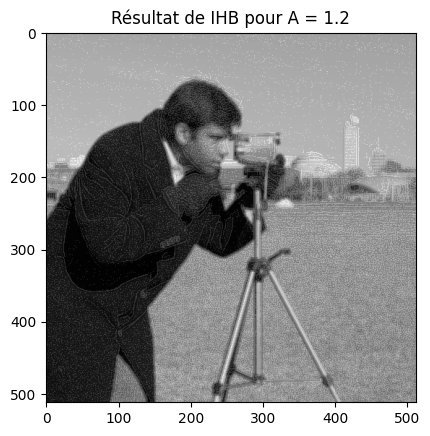

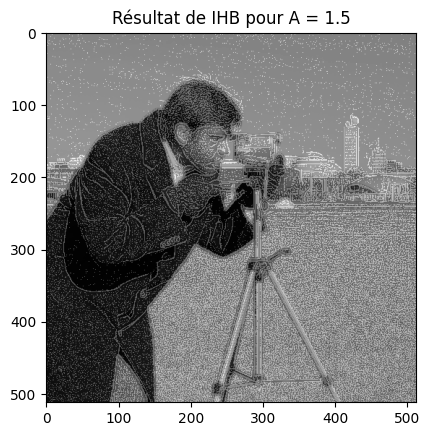

In [74]:
from re import A
# Valeurs de A
valeurs_A = [1.1, 1.2, 1.5]

for A in valeurs_A:
    resultat_ihb = (A - 1) * IPH + IPB

    # Afficher le résultat pour la valeur actuelle de A
    plt.imshow(resultat_ihb, cmap='gray')
    plt.title(f'Résultat de IHB pour A = {A}')
    plt.show()

 Filtres passe-haut prédéfinis

In [101]:
from skimage import io, color, filters
from skimage.color import rgb2gray , gray2rgb

In [76]:
# Charger l'image L.png
image_l = io.imread('L.png')

In [80]:
# Vérifier la dimension de l'image
if image_l.shape[-1] == 4:
    # Convertir l'image RGBA en RGB
    image_rgb = color.rgba2rgb(image_l)
    # Convertir l'image en niveaux de gris
    image_gray = color.rgb2gray(image_rgb)
else:
    # L'image est déjà en niveaux de gris (1 canal)
    image_gray = image_l

In [81]:
# Appliquer le filtre de Sobel pour la détection de contours
sobel_filtered = filters.sobel(image_gray)


In [82]:
# Appliquer le filtre de Prewitt pour la détection de contours
prewitt_filtered = filters.prewitt(image_gray)


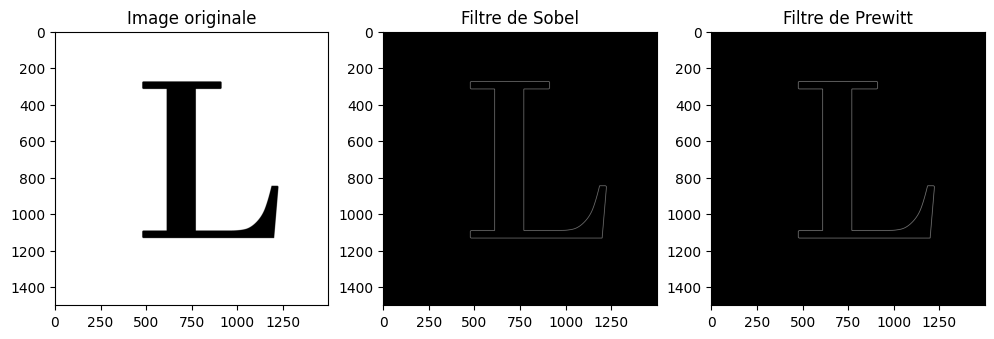

In [83]:
# Afficher les résultats
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(image_gray, cmap='gray')
plt.title('Image originale')

plt.subplot(132)
plt.imshow(sobel_filtered, cmap='gray')
plt.title('Filtre de Sobel')

plt.subplot(133)
plt.imshow(prewitt_filtered, cmap='gray')
plt.title('Filtre de Prewitt')

plt.show()

In [89]:
# Seuils à tester
seuils = [0.02, 0.1, 0.4]



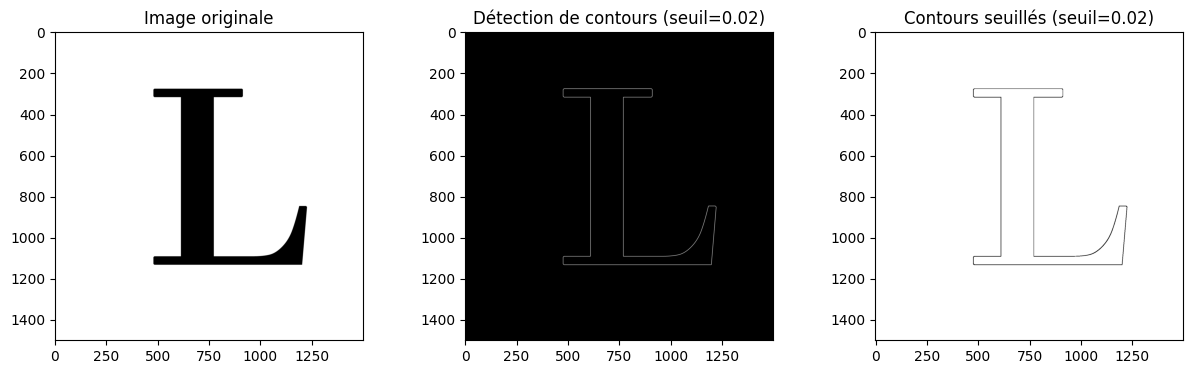

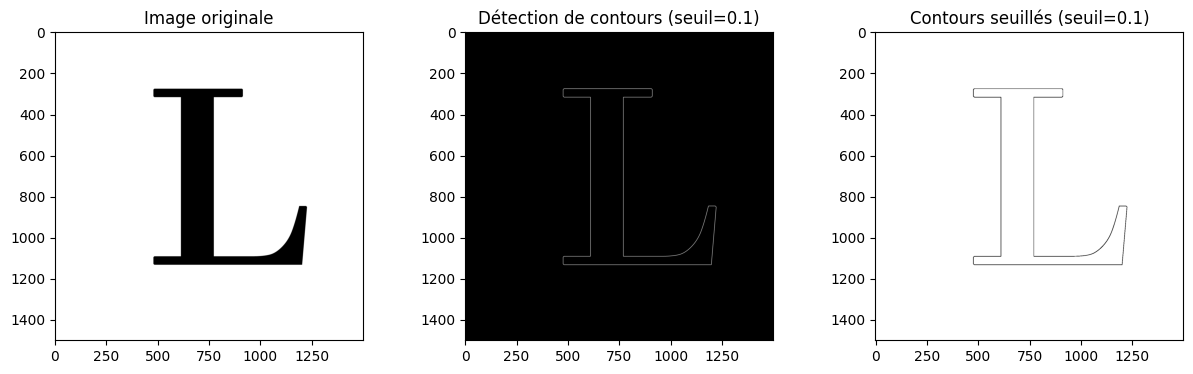

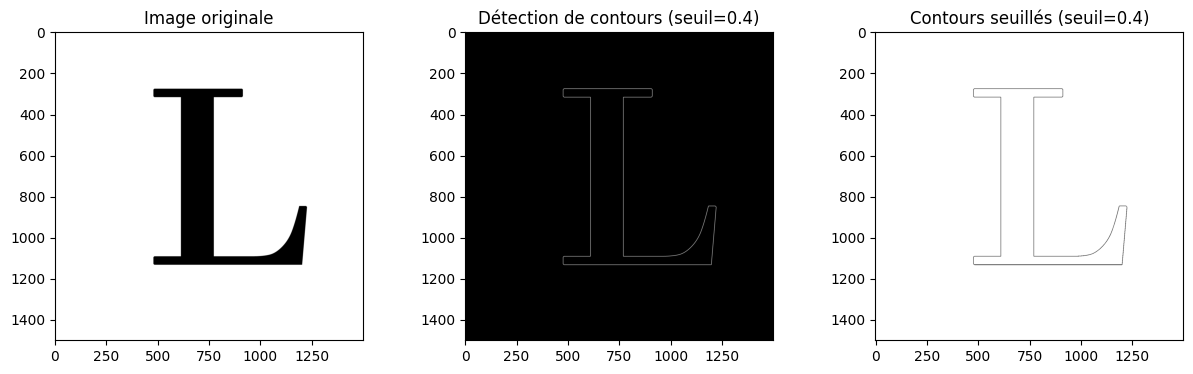

In [91]:


# Afficher les résultats pour chaque seuil
for i, seuil in enumerate(seuils, 1):
    # Appliquer le seuil
    contours_detectes = sobel_filtered > seuil * sobel_filtered.max()

    # Afficher les résultats
    plt.figure(figsize=(15, 4))

    plt.subplot(131)
    plt.imshow(image_gray, cmap='gray')
    plt.title(f'Image originale')

    plt.subplot(132)
    plt.imshow(sobel_filtered, cmap='gray')
    plt.title(f'Détection de contours (seuil={seuil})')

    plt.subplot(133)
    plt.imshow(contours_detectes, cmap='binary')
    plt.title(f'Contours seuillés (seuil={seuil})')

    plt.show()

In [93]:
# Trouver le seuil optimal avec la méthode d'Otsu
seuil_otsu = filters.threshold_otsu(sobel_filtered)

In [94]:
# Appliquer le seuil optimal
contours_otsu = sobel_filtered > seuil_otsu

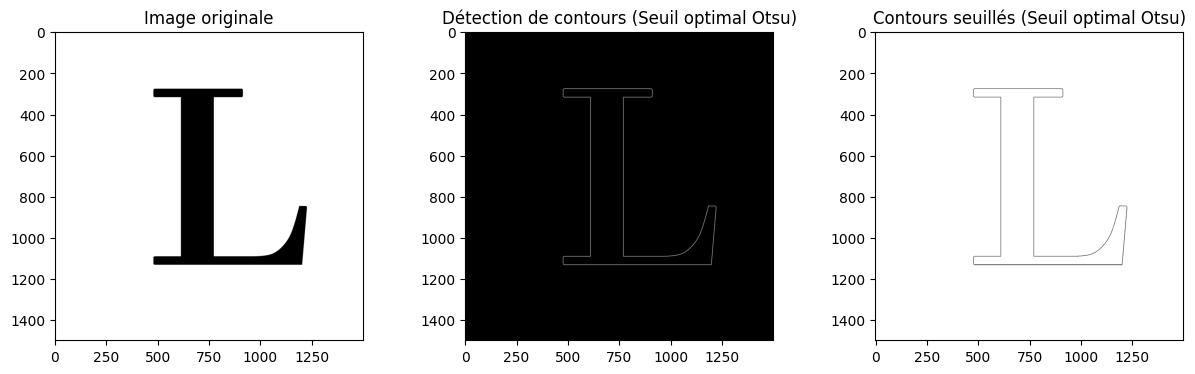

In [96]:
# Afficher les résultats
plt.figure(figsize=(15, 4))

plt.subplot(131)
plt.imshow(image_gray, cmap='gray')
plt.title(f'Image originale')

plt.subplot(132)
plt.imshow(sobel_filtered, cmap='gray')
plt.title(f'Détection de contours (Seuil optimal Otsu)')

plt.subplot(133)
plt.imshow(contours_otsu, cmap='binary')
plt.title(f'Contours seuillés (Seuil optimal Otsu)')

plt.show()



In [103]:
from skimage import feature

In [97]:
# Appliquer le filtre de Canny avec différentes valeurs de sigma
sigmas = [0.1, 1, 5]

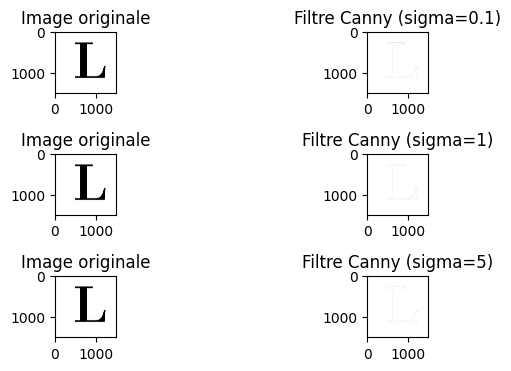

In [106]:


# Afficher l'image originale
plt.subplot(len(sigmas) + 1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Image originale')

for i, sigma in enumerate(sigmas, 1):
    canny_filtered = feature.canny(image_gray, sigma=sigma)

    # Afficher le filtre Canny pour différentes valeurs de sigma
    plt.subplot(len(sigmas) + 1, 2, i * 2)
    plt.imshow(canny_filtered, cmap='binary')
    plt.title(f'Filtre Canny (sigma={sigma})')

    # Afficher l'image originale dans la colonne de gauche
    plt.subplot(len(sigmas) + 1, 2, i * 2 - 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title(f'Image originale')

# Ajuster l'espacement entre les sous-plots pour une meilleure lisibilité
plt.tight_layout()
plt.show()

**Filtre Canny (sigma=0.1) :**

 Le filtre avec une petite valeur de sigma est plus sensible aux détails fins et aux contours subtils.


**Filtre Canny (sigma=1) :**

 Un sigma moyen offre un bon équilibre entre la suppression du bruit et la détection des contours.


**Filtre Canny (sigma=5) :**

 Le filtre avec une valeur de sigma plus grande lisse davantage l'image, supprimant davantage de bruit.


---->Le filtre Canny offre généralement **une meilleure suppression du bruit** que le filtre de Sobel en ajustant correctement le sigma.